# Packages utiliser 

In [1]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
from keras.utils import plot_model
from keras.models import model_from_yaml
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import random
import cv2
import os
import pydot
import graphviz
import numpy as np
import imutils
import pickle
from IPython.display import SVG

Using TensorFlow backend.


# Model CNN(VGG)

In [2]:

class SmallerVGGNet:
    @staticmethod
    def build(width, height, depth, classes, finalAct="softmax"):
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1
        #First part of the model 
        model.add(Conv2D(32, (3, 3), padding="same",
             input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(3, 3)))
        model.add(Dropout(0.25))
        #Second part of the model 
        model.add(Conv2D(64, (3, 3), padding="same",
              input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same",
             input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
         #Third part of the model 
        model.add(Conv2D(128, (3, 3), padding="same",
             input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same",
             input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(1024))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        model.add(Dense(classes))
        model.add(Activation(finalAct))
        return model

# Apprentissage du model 


In [3]:
# nombre d'époques le modèle devrait être formé 
EPOCHS = 17
#taux d'apprentissage
INIT_LR = 1e-3
#Taille du lot
BS = 32
# Dimensions d'entrée
IMAGE_DIMS = (96, 96, 3)
#Dossier d'entrée
INPUT_FOLDER = '/home/kamel/Vidéos/code/dataset'

## Saisir les chemins d’image et les mélanger au hasard 

In [4]:
imagePaths= os.listdir(INPUT_FOLDER)
imagePaths = sorted(list(paths.list_images(INPUT_FOLDER)))
random.seed(42)
random.shuffle(imagePaths)

In [5]:

#les données seront stockées ici
dt = []

#les étiquettes des fruits seront stockées ici
labels = []

# boucle sur les images d'entrée
for imagePath in imagePaths:
 # charger l'image, la pré-traiter et la stocker dans la liste de données
    image = cv2.imread(imagePath)
    print(imagePath)
    image = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
    image = img_to_array(image)
    dt.append(image)
    x = image.reshape((1,) + image.shape)
   
 # extraire un ensemble d’étiquettes de classe du chemin de l’image et mettre à jour le
    #liste des étiquettes
    l = label = imagePath.split(os.path.sep)[-2].split("_")
    labels.append(l)


# redimensionne les intensités brutes de pixels dans l'intervalle [0, 1]
dt = np.array(dt, dtype="float") / 255.0
labels = np.array(labels)


/home/kamel/Vidéos/code/dataset/Ananas/aug_0_1188.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_6733.jpg
/home/kamel/Vidéos/code/dataset/Ananas/aug_0_8242.jpg
/home/kamel/Vidéos/code/dataset/Ananas/aug_0_5302.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_7877.jpg
/home/kamel/Vidéos/code/dataset/Ananas/aug_0_4950.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_149.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_4391.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_6192.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_285.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_2211.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_9037.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_9558.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_7299.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_5010.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_5577.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_3988.jpg
/home/kamel/Vidéos/code/dataset/Ananas/aug_0_4054.jpg
/home/kamel/Vidéos/code/dataset/Pomme

/home/kamel/Vidéos/code/dataset/Banane/aug_0_3522.jpg
/home/kamel/Vidéos/code/dataset/Ananas/aug_0_1169.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_5125.jpg
/home/kamel/Vidéos/code/dataset/Ananas/aug_0_6741.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_4057.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_7489.jpg
/home/kamel/Vidéos/code/dataset/Ananas/aug_0_4338.jpg
/home/kamel/Vidéos/code/dataset/Ananas/aug_0_6175.jpg
/home/kamel/Vidéos/code/dataset/Ananas/aug_0_7796.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_8698.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_1942.jpg
/home/kamel/Vidéos/code/dataset/Ananas/aug_0_383.jpg
/home/kamel/Vidéos/code/dataset/Ananas/aug_0_6407.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_9401.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_7497.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_6393.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_2117.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_7572.jpg
/home/kamel/Vidéos/code/dataset/Ban

/home/kamel/Vidéos/code/dataset/Banane/aug_0_5692.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_7090.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_8731.jpg
/home/kamel/Vidéos/code/dataset/Ananas/aug_0_2174.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_7712.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_7980.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_3897.jpg
/home/kamel/Vidéos/code/dataset/Ananas/aug_0_5014.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_5022.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_4793.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_1471.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_5851.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_3271.jpg
/home/kamel/Vidéos/code/dataset/Ananas/aug_0_5073.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_9381.jpg
/home/kamel/Vidéos/code/dataset/Ananas/aug_0_9480.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_2723.jpg
/home/kamel/Vidéos/code/dataset/Ananas/aug_0_8268.jpg
/home/kamel/Vidéos/code/dataset/P

/home/kamel/Vidéos/code/dataset/Ananas/aug_0_2103.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_1937.jpg
/home/kamel/Vidéos/code/dataset/Ananas/aug_0_3924.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_6215.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_5388.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_224.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_2770.jpg
/home/kamel/Vidéos/code/dataset/Ananas/aug_0_9954.jpg
/home/kamel/Vidéos/code/dataset/Ananas/aug_0_6403.jpg
/home/kamel/Vidéos/code/dataset/Ananas/aug_0_1579.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_2783.jpg
/home/kamel/Vidéos/code/dataset/Ananas/aug_0_6382.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_8188.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_5366.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_1142.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_1584.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_6831.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_2513.jpg
/home/kamel/Vidéos/code/dataset/Anana

/home/kamel/Vidéos/code/dataset/Banane/aug_0_908.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_9174.jpg
/home/kamel/Vidéos/code/dataset/Ananas/aug_0_3626.jpg
/home/kamel/Vidéos/code/dataset/Ananas/aug_0_6723.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_2656.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_5401.jpg
/home/kamel/Vidéos/code/dataset/Ananas/aug_0_7912.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_4566.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_7164.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_7120.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_2180.jpg
/home/kamel/Vidéos/code/dataset/Ananas/aug_0_4808.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_398.jpg
/home/kamel/Vidéos/code/dataset/Ananas/aug_0_7254.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_4276.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_9569.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_9810.jpg
/home/kamel/Vidéos/code/dataset/Ananas/aug_0_7839.jpg
/home/kamel/Vidéos/code/dataset/Bana

/home/kamel/Vidéos/code/dataset/Pomme/aug_0_8241.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_7863.jpg
/home/kamel/Vidéos/code/dataset/Ananas/aug_0_3004.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_8818.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_9964.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_7756.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_15.jpg
/home/kamel/Vidéos/code/dataset/Ananas/aug_0_8485.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_9593.jpg
/home/kamel/Vidéos/code/dataset/Ananas/aug_0_7115.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_1426.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_1660.jpg
/home/kamel/Vidéos/code/dataset/Ananas/aug_0_5789.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_158.jpg
/home/kamel/Vidéos/code/dataset/Pomme/aug_0_4770.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_8497.jpg
/home/kamel/Vidéos/code/dataset/Banane/aug_0_3811.jpg
/home/kamel/Vidéos/code/dataset/Ananas/aug_0_8682.jpg
/home/kamel/Vidéos/code/dataset/Pom

In [6]:

# binarisez les étiquettes en utilisant le multi-label spécial de scikit-learn
# implémentation binarizer
print( "les  labels:")
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(labels)

# boucle sur chacune des étiquettes de classe possibles et les montre
for (i, label) in enumerate(mlb.classes_):
    print("{}. {}".format(i + 1, label))
print("[INFO] serializing label binarizer...")
f = open('mlb.pickle', "wb")
f.write(pickle.dumps(mlb))
f.close()

les  labels:
1. Ananas
2. Banane
3. Pomme
[INFO] serializing label binarizer...


In [7]:

#Dans cette section, nous fractionnons les données en 20% pour test et 80% pour la formation.
(trainX, testX, trainY, testY) = train_test_split(dt,
   labels, test_size=0.2, random_state=42)

# construit le générateur d'image pour l'augmentation de données
augmentation= ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
   height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
   horizontal_flip=True, fill_mode="nearest")


model = SmallerVGGNet.build(
    width=IMAGE_DIMS[1], height=IMAGE_DIMS[0],
    depth=IMAGE_DIMS[2], classes=len(mlb.classes_),
    finalAct="softmax")

# initialiser l'optimiseur
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
    metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


##  Aprentissage du reseau

In [8]:
H = model.fit_generator(
    augmentation.flow(trainX, trainY, batch_size=BS),
    validation_data=(testX, testY),
    steps_per_epoch=len(trainX) // BS,
    epochs=EPOCHS, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/17
26/26 [==============================] - 41s 2s/step - loss: 0.2056 - acc: 0.9435 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 2/17
26/26 [==============================] - 37s 1s/step - loss: 0.0508 - acc: 0.9904 - val_loss: 4.2734e-05 - val_acc: 1.0000
Epoch 3/17
26/26 [==============================] - 37s 1s/step - loss: 0.0198 - acc: 0.9916 - val_loss: 3.4464e-07 - val_acc: 1.0000
Epoch 4/17
26/26 [==============================] - 34s 1s/step - loss: 0.0111 - acc: 0.9976 - val_loss: 3.1434e-05 - val_acc: 1.0000
Epoch 5/17
26/26 [==============================] - 33s 1s/step - loss: 6.6845e-04 - acc: 1.0000 - val_loss: 1.4661e-07 - val_acc: 1.0000
Epoch 6/17
26/26 [==============================] - 33s 1s/step - loss: 0.0141 - acc: 0.9976 - val_loss: 1.9892e-05 - val_acc: 1.0000
Epoch 7/17
26/26 [==============================] - 32s 1s/step - loss: 0.0169 - acc: 0.9940 - val_loss: 0.4100 - val_acc: 0.9336
Epoch 8/17
26/26 [

In [9]:
score = model.evaluate(testX, testY, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

211/211 [==============================] - 2s 8ms/step
Test loss: 1.372884364422936e-07
Test accuracy: 1.0


# Afficher le graphe de acuracy / loss 

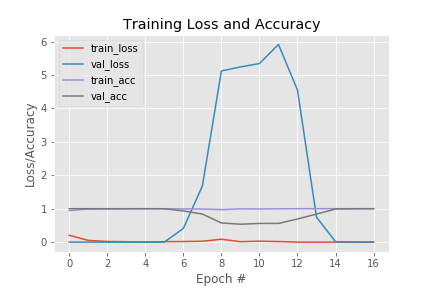

In [10]:
import matplotlib
matplotlib.use("Agg")
#plot the accuracy and the loss per epoch in the same graph
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.savefig('/home/kamel/Vidéos/Accuracy_Loss.png')
from IPython.display import Image
Image('/home/kamel/Vidéos/Accuracy_Loss.png')

# tester le programe avec de nouvelle images 

In [ ]:

image = cv2.imread('/home/kamel/Vidéos/code/nvl_images_test/gala.jpg')
output = imutils.resize(image, width=400)
 
# pré-traiter l'image pour la classification
image = cv2.resize(image, (96, 96))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

# charge le réseau de neurones convolutifs formés et le multi-label
# binarizer
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
model = model_from_yaml(loaded_model_yaml)

# charge le poids dans le nouveau modèle
model.load_weights("model.h5")
print("Loaded model from disk")
 
mlb = pickle.loads(open('mlb.pickle', "rb").read())


# étiquettes avec la * plus * grande probabilité
print("[INFO] classifying image...")
proba = model.predict(image)[0]
idxs = np.argsort(proba)[::-1][:4]


# Boucle  sur les index des étiquettes de classe de confiance élevée
for (i, j) in enumerate(idxs):
    
# construit l'étiquette et dessine l'étiquette sur l'image
    label = "{}: {:.2f}%".format(mlb.classes_[j], proba[j] * 100)
    cv2.putText(output, label, (10, (i * 30) + 25), 
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)


# affiche les probabilités pour chacune des étiquettes individuelles
for (label, p) in zip(mlb.classes_, proba):
    print("{}: {:.2f}%".format(label, p * 100))


# affiche l'image de sortie
cv2.imshow("Result",output)
cv2.waitKey(0)

Loaded model from disk
[INFO] classifying image...
Ananas: 32.72%
Banane: 33.28%
Pomme: 34.00%
